In [3]:
# Imports and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os

print("Libraries loaded.")

Libraries loaded.


In [4]:
# 1. Load Dataset
# We use the 'Adult' dataset as per requirements (predicting income)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'sex',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

try:
    df = pd.read_csv(url, names=columns, sep=', ', engine='python')
    print("Dataset loaded successfully.")
except:
    print("Error loading dataset. Check internet connection.")

# Handle Missing Values (represented as '?')
df = df.replace('?', np.nan).dropna()
print(f"Cleaned dataset shape: {df.shape}")

Dataset loaded successfully.
Cleaned dataset shape: (30162, 15)


In [5]:
# 2. Preprocessing
# Encoding Categorical Variables
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split Features and Target
X = df.drop('income', axis=1)
y = df['income']

# Scaling Features (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Data preprocessing complete.")

Data preprocessing complete.


In [6]:
# 3. Build ANN Architecture
model = keras.Sequential([
    # Input Layer & Hidden Layer 1
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    # Hidden Layer 2
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    # Hidden Layer 3
    layers.Dense(32, activation='relu'),
    
    # Output Layer (Binary Classification: Sigmoid)
    layers.Dense(1, activation='sigmoid')
])

# Compilation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1920      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [7]:
# 4. Train Model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Save the model
model.save('models/ann_model.h5')

Epoch 1/20
604/604 [==============================] - 8s 7ms/step - loss: 0.4277 - accuracy: 0.7915 - val_loss: 0.3531 - val_accuracy: 0.8303
Epoch 2/20
604/604 [==============================] - 4s 7ms/step - loss: 0.3706 - accuracy: 0.8238 - val_loss: 0.3429 - val_accuracy: 0.8388
Epoch 3/20
604/604 [==============================] - 4s 6ms/step - loss: 0.3592 - accuracy: 0.8291 - val_loss: 0.3415 - val_accuracy: 0.8367
Epoch 4/20
604/604 [==============================] - 4s 6ms/step - loss: 0.3498 - accuracy: 0.8351 - val_loss: 0.3352 - val_accuracy: 0.8375
Epoch 5/20
604/604 [==============================] - 4s 6ms/step - loss: 0.3482 - accuracy: 0.8377 - val_loss: 0.3352 - val_accuracy: 0.8404
Epoch 6/20
604/604 [==============================] - 4s 6ms/step - loss: 0.3465 - accuracy: 0.8358 - val_loss: 0.3375 - val_accuracy: 0.8419
Epoch 7/20
604/604 [==============================] - 4s 6ms/step - loss: 0.3428 - accuracy: 0.8418 - val_loss: 0.3338 - val_accuracy: 0.8427
Epoch 

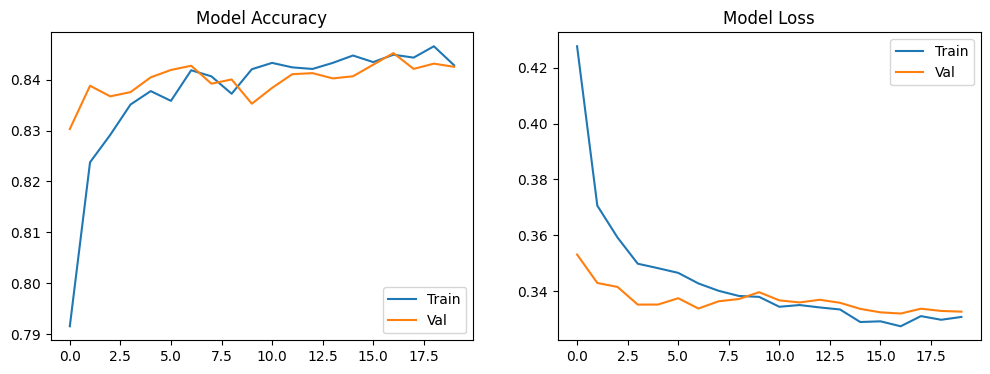

189/189 [==============================] - 2s 6ms/step

=== Model Evaluation Report ===
Accuracy: 0.8487

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      4503
           1       0.74      0.62      0.68      1530

    accuracy                           0.85      6033
   macro avg       0.81      0.77      0.79      6033
weighted avg       0.84      0.85      0.84      6033



In [8]:
# 5. Evaluation & Plots
# Plot Accuracy and Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Model Loss')
plt.legend()
plt.show()

# Predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Metrics
print("\n=== Model Evaluation Report ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))



---

### Explanation of Architecture
1. **Input Layer**: Matches the number of features in the dataset.
2. **Hidden Layers**: We used ReLU (Rectified Linear Unit) activation functions because they are computationally efficient and solve the vanishing gradient problem.
   - **Dropout**: Added to prevent overfitting by randomly disabling neurons during training.
   - **BatchNormalization**: Stabilizes the learning process.
3. **Output Layer**: Uses 'Sigmoid' activation because this is a binary classification task (Income <=50K or >50K), outputting a probability between 0 and 1.
4. **Optimizer**: 'Adam' was selected for its adaptive learning rate capabilities.

---